In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data=pd.read_csv(r'ds2_train.csv')

In [43]:
data


,x_1,x_2,y
0,3.759481,7.507940,0.0
1,3.422057,4.991203,0.0
2,2.778818,4.112071,0.0
3,4.018066,5.653732,0.0
4,1.806062,4.685966,0.0
...,...,...,...
795,4.328355,3.673261,1.0
796,3.167061,2.956635,1.0
797,3.544105,2.649879,1.0
798,2.575461,2.517255,1.0


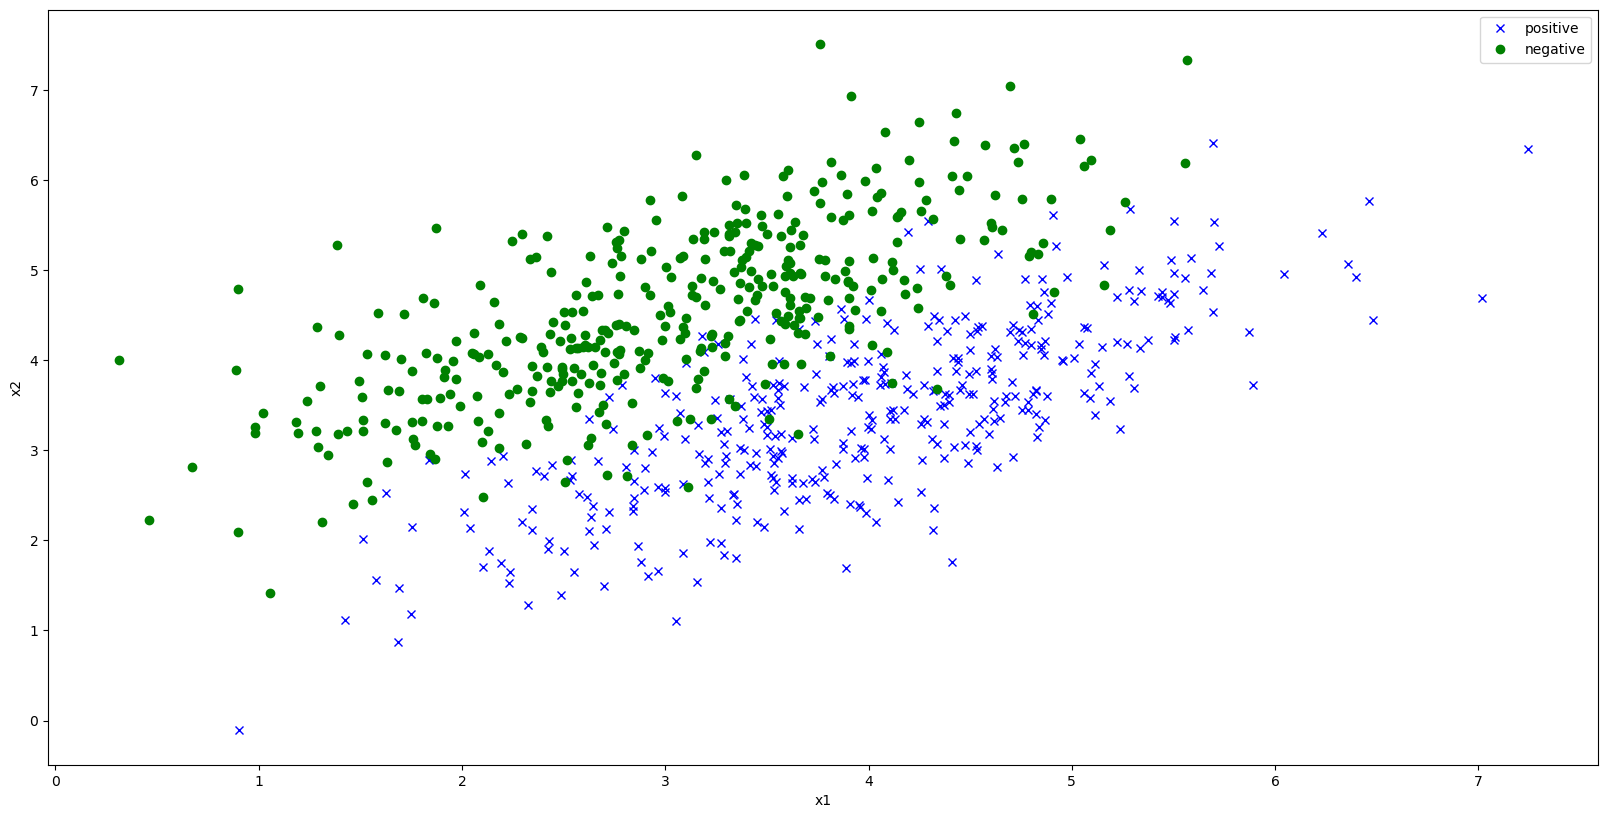

In [44]:
##################################################plotting the dataset##########################################################

x_train=data.loc[:,['x_1','x_2']]
y_train=data.loc[:,['y']]

ind=y_train[y_train['y']==1].index.tolist()
ind1=y_train[y_train['y']==0].index.tolist()

xx=x_train[['x_1']].values
xx1=x_train[['x_2']].values

x_1_mod=xx[ind,:]
x_1_mod1=xx[ind1,:]

x_2_mod=xx1[ind,:]
x_2_mod1=xx1[ind1 ,:]

plt.figure(figsize=(20,10),dpi=100)
plt.plot(x_1_mod,x_2_mod,'bx',linewidth=1)
plt.plot(x_1_mod1,x_2_mod1,'go',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['positive','negative'])
plt.show()

xv=x_train.values
colsx=x_train.shape[0]
zer=np.ones((colsx,1))
x_train_new=np.hstack((zer,xv))

In [45]:
#####################################################TRAINING THE MODEL##########################################################




#mean=np.mean(x_train.values,axis=0)
#mean_arr=np.tile(mean,(x_train.values.shape[0],1))

#stdn=np.std(x_train.values,axis=0)
#std_arr=np.tile(stdn,(x_train.values.shape[0],1))

#me=(x_train.values-mean_arr)

#x_train_new1=np.divide(me,std_arr)
itera=0
col_x=(x_train_new.shape[1])
theta1=np.zeros((col_x,1))
all_theta=[]
while itera<8:
    theta=theta1
    all_theta.append(theta)
    htheta=1/(1+(np.exp(-1*((x_train_new)@theta))))
    del_ltheta=(x_train_new.T)@((y_train.values)-htheta)
    H=((htheta.T).dot((htheta-1)))*((x_train_new.T)@x_train_new)
    H_inv=np.linalg.inv(H)
    theta1=theta-(H_inv@del_ltheta)
    

    #if np.linalg.norm((theta1-theta),ord=1)< 1e-5:
         #break
        
    
    itera+=1

theta=theta1


y_pred=1/(1+(np.exp(-1*((x_train_new)@theta))))

y_pred_new=np.where(y_pred>=0.5,1,0)



error=np.absolute(y_train.values-y_pred_new)
accuracy=100-((np.mean(error))*100)

accuracy

91.375

In [46]:

data_val=pd.read_csv(r'ds2_valid.csv')


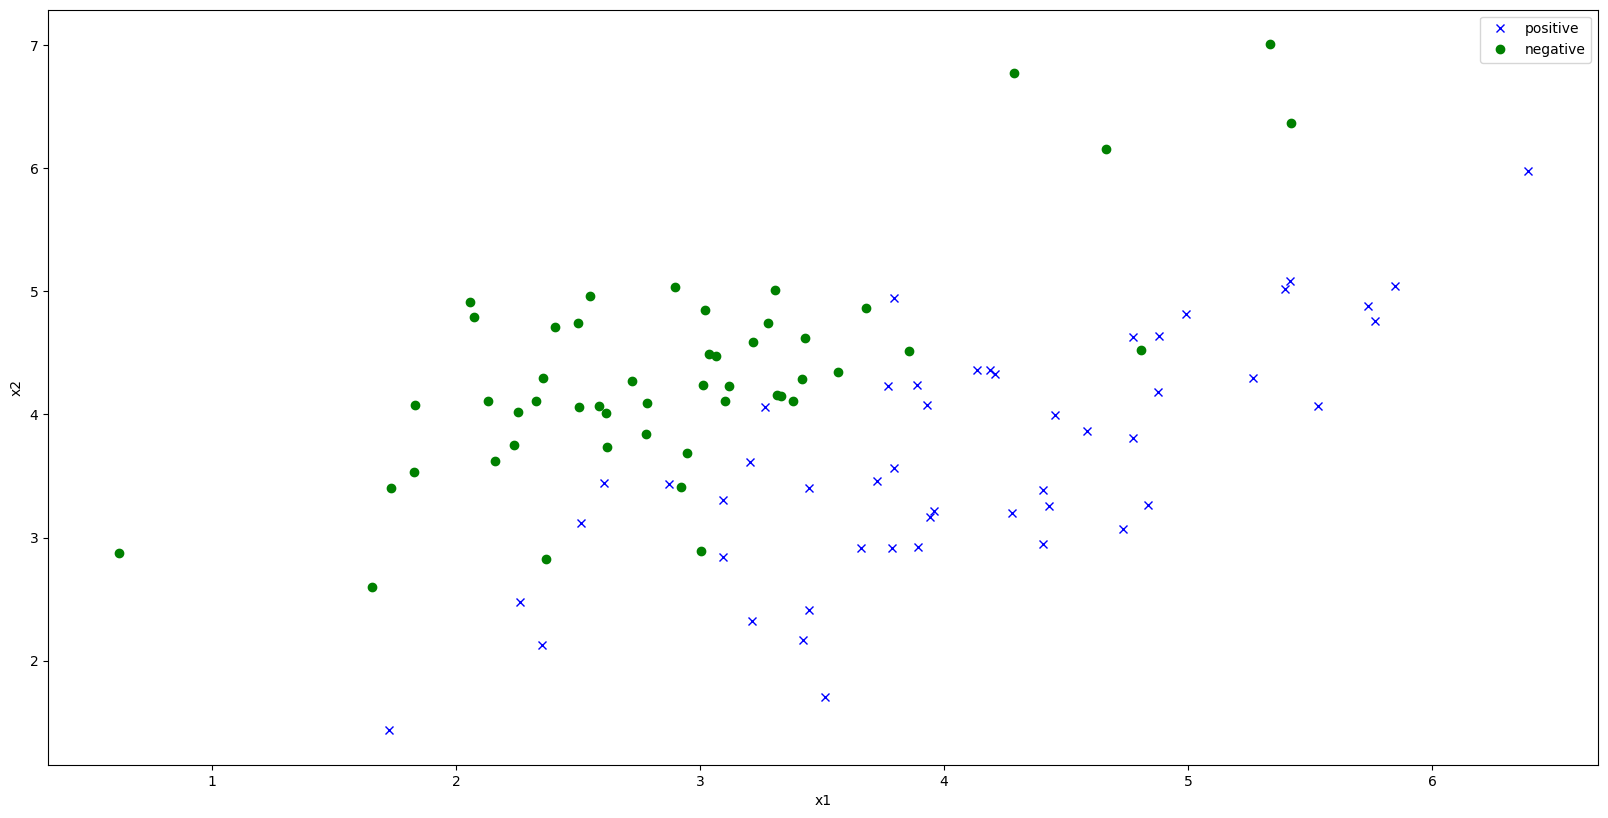

In [47]:
###########################################plotting the valid dataset###########################################################

x_val=data_val.loc[:,['x_1','x_2']]
y_val=data_val.loc[:,['y']]

ind_val=y_val[y_val['y']==1].index.tolist()
ind1_val=y_val[y_val['y']==0].index.tolist()

xx_val=x_val[['x_1']].values
xx1_val=x_val[['x_2']].values

x_1_mod_val=xx_val[ind_val,:]
x_1_mod1_val=xx_val[ind1_val,:]

x_2_mod_val=xx1_val[ind_val,:]
x_2_mod1_val=xx1_val[ind1_val ,:]

plt.figure(figsize=(20,10),dpi=100)
plt.plot(x_1_mod_val,x_2_mod_val,'bx',linewidth=1)
plt.plot(x_1_mod1_val,x_2_mod1_val,'go',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['positive','negative'])
plt.show()

xv_val=x_val.values
colsx_val=x_val.shape[0]
zer_val=np.ones((colsx_val,1))
x_val_new=np.hstack((zer_val,xv_val))

In [48]:
############################################ACCURACY ON VALIDATION DATASET######################################################

y_pred_val=1/(1+(np.exp(-1*((x_val_new)@theta))))

y_pred_new_val=np.where(y_pred_val>=0.5,1,0)



error_val=np.absolute(y_val.values-y_pred_new_val)
accuracy_val=100-((np.mean(error_val))*100)

accuracy_val

91.0

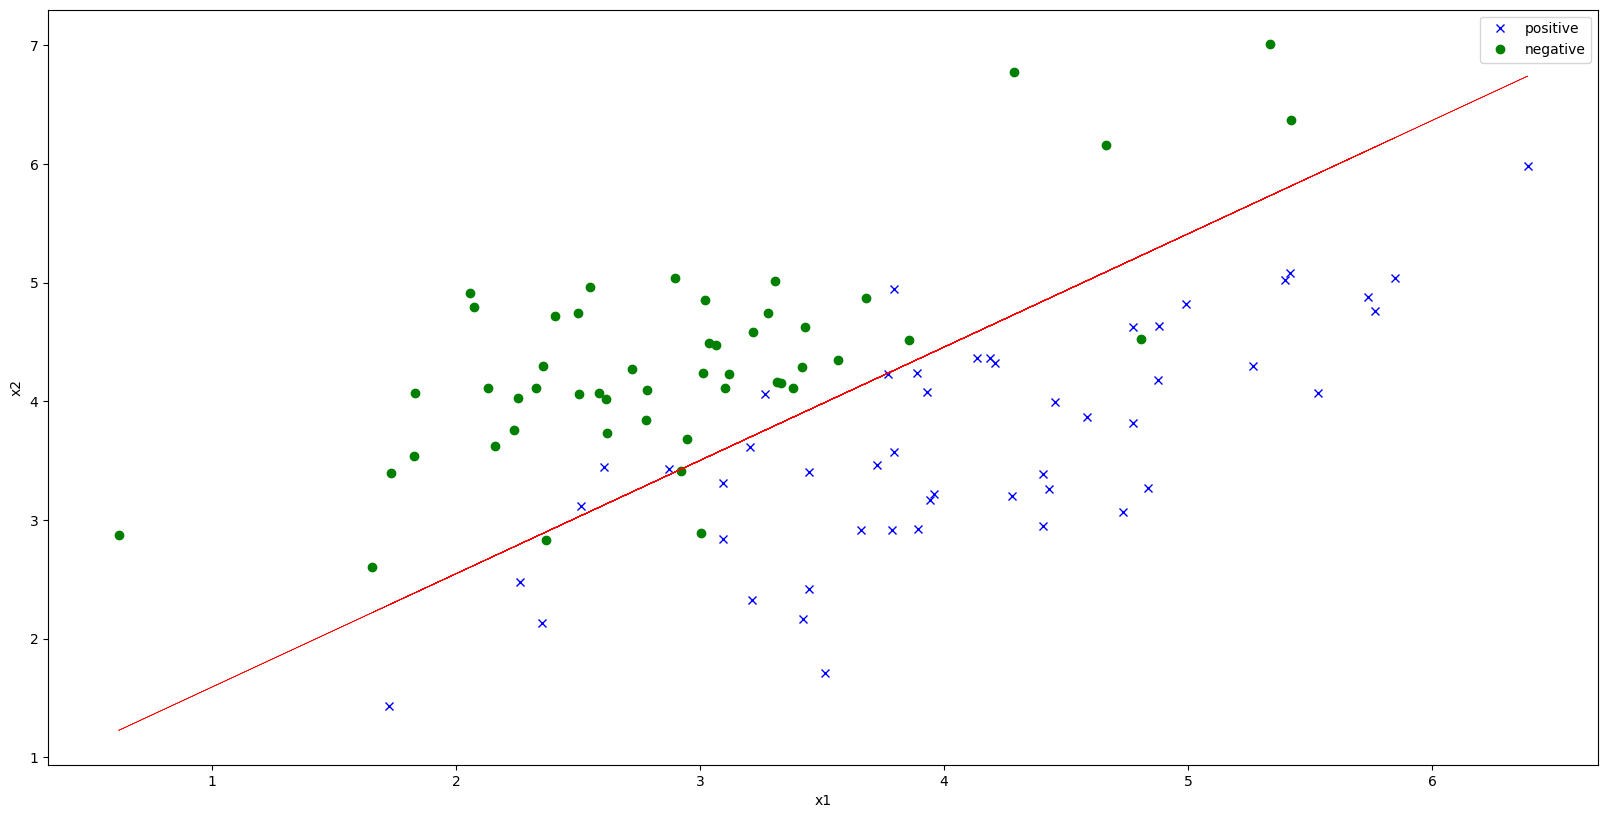

In [49]:
###############################################fitting the model################################################################

x2=(-1*(theta[0]/theta[2]))+(-1*((theta[1]/theta[2])*xx_val))


f=plt.figure(figsize=(20,10),dpi=100)
plt.plot(x_1_mod_val,x_2_mod_val,'bx',linewidth=1)
plt.plot(x_1_mod1_val,x_2_mod1_val,'go',linewidth=0.5)
plt.plot(xx_val,x2,'r',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['positive','negative'])
plt.show()
f.savefig('prob_1b_data2_pred.png')